In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records.

In [3]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [4]:
len(data[data['Dataset']==2])

167

In [5]:
len(data[data['Dataset']==1])

416

Columns:

* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)
* Dataset: пациент с болезнью печени - 1, пациент не болеет - 2

__Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin__

Коэффициент корреляции Пирсона: 0.8746179301164133


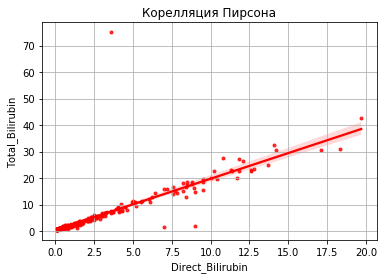

In [26]:
from scipy.stats import pearsonr
x = data.Direct_Bilirubin
y = data.Total_Bilirubin

corr, p_value = pearsonr(x, y)

sns.regplot(x, y, data, marker='.', fit_reg=True, color="r")

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Корелляция Пирсона')
plt.grid(True)
print('Коэффициент корреляции Пирсона:', corr)

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.


In [27]:
medv = np.array(data.Direct_Bilirubin).reshape(-1,1)
lstat = np.array(data.Total_Bilirubin).reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
#деление на тренировочные и тестовые данные 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2
)

In [29]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

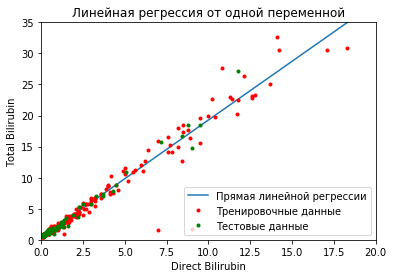

In [34]:
#Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.title('Линейная регрессия от одной переменной')

# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)

# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.xlim(0,20)
plt.ylim(0,35)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [35]:
age = data['Age']

In [36]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1))

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data



In [37]:
data.quantile([.10, .25, .50, .75], axis = 0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [38]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


__Посчитать квартили для всех колонок__.

In [70]:
#кажется, так можно отдельно три квартили посчитать

data.quantile([.25, .50, .75], axis = 0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


__Построить график histogram двух выборок по показателю Direct_Bilirubin__: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?


In [53]:
data_young = data.loc[ data.Age < 50 ]

data_old = data.loc[ data.Age >= 50 ]

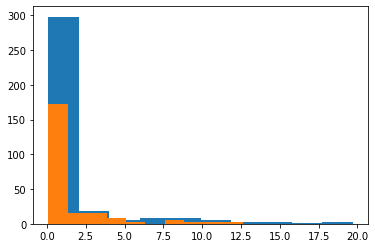

In [69]:
plt.hist(data_young.Direct_Bilirubin, 10)
plt.hist(data_old.Direct_Bilirubin, 10)
plt.show()

In [73]:
#среднее значение
import statistics

statistics.mean(data.Direct_Bilirubin)

1.486106346483705

In [42]:
#квартиль 0.5 

np.quantile(data.Direct_Bilirubin, .50)

0.3

__Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей__. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных (выборки полученной) - 1)

In [78]:
data_disease = data.loc[ data.Dataset == 1 ]

In [79]:
stats.ttest_1samp(data_disease.Total_Bilirubin, data.Total_Bilirubin.mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [83]:
#количество больных

len(data_disease.Total_Bilirubin)

416

In [84]:
#T-значение получается 2.471063305746647 — но с чем в таблице его сравнивать? 416 там нет же, а как преобразовать, не понимаю
#p-value 0.0138 — это меньше alpha = 0.05 и получается, что гипотеза о том что нет разичия между билирубином у выборки из больных
#и во всей совокупности — неверная 

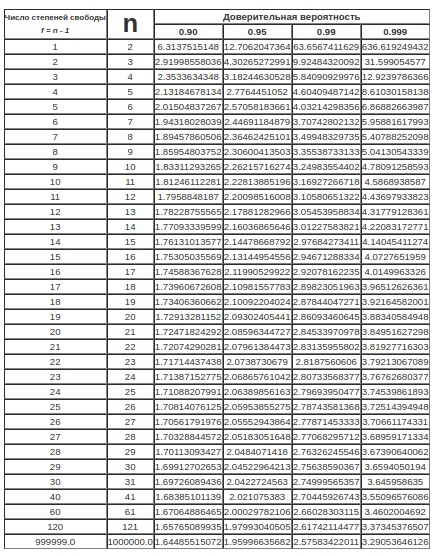

In [1]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

__Посчитать критерий t для двух выборок__: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

In [88]:
data_no_disease = data[data.Dataset==2]

In [89]:
stats.ttest_ind(data_disease.Total_Bilirubin, data_no_disease.Total_Bilirubin)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

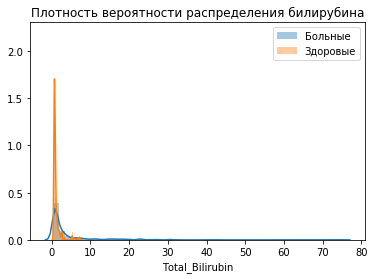

In [104]:
#t-значение тут 5.44 — видимо, это свидетельствует что группы сильно различаются между собой
#p-value очень большое — а вот тут я не понимаю, судя по примерам из лекционного ноутбука, разве не должно оно быть низкин, наборот?
#нарисовал для понимания себе

sns.distplot(data_disease.Total_Bilirubin)
sns.distplot(data_no_disease.Total_Bilirubin)
plt.title('Плотность вероятности распределения билирубина')
plt.legend(['Больные', 'Здоровые'])
plt.show()

Посчитать статистическую значимость для трех выборок (по возрасту) -тест Anova - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [136]:
age_1 = data[data.Age < 30]['Dataset']
age_2 = data[data.Age >= 30][data.Age < 55]['Dataset']
age_3 = data[data.Age > 55]['Dataset']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [138]:
#множественный тест Anova — p-value очень низкий, меньше куда 0,05 и значит, группы сильно отличаются (это логично как раз)

stats.f_oneway(age_1, age_2, age_3)

F_onewayResult(statistic=8.979641248857694, pvalue=0.00014494594843704077)